In [5]:
! pip install censusdata

     |████████████████████████████████| 26.6 MB 1.4 MB/s eta 0:00:01
  Created wheel for censusdata: filename=CensusData-1.15-py3-none-any.whl size=28205516 sha256=d6b68d891f620b0486e64215549b36c77018d6de58807de9652ea93ea1f4e33c
  Stored in directory: /Users/michelleorden/Library/Caches/pip/wheels/1f/06/6b/e0561383170648c354625bd161b5a2bdf0d5a79067ec66e80c
Successfully built censusdata


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import censusdata
import numpy as np

# Module 1: Data Exploration

## 1. Ridesharing Data

In [9]:
# Exploring a 100,000 row subset of the larger dataset
mini_df = pd.read_csv("data/100ksample.csv", index_col=0)

In [10]:
# Random 0.003% sample of entire 2019 dataset
df_003 = pd.read_csv("data/sample_003.csv", compression="gzip")

In [11]:
df_003.head()

,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,96692526,9c54e99de2a3eb56af84eb128c98d9f723a2cd72,11/11/2019 11:30:00 AM,11/11/2019 11:45:00 AM,524.0,1.9,NaN,NaN,29.0,NaN,...,2.55,10.05,False,1,41.860190,-87.717220,POINT (-87.7172201 41.8601900192),NaN,NaN,NaN
1,11025760,e5af9ebfe60312b7f5ee17b16f6d8ebb8533a52d,02/08/2019 10:15:00 AM,02/08/2019 10:30:00 AM,854.0,3.0,1.703124e+10,1.703184e+10,24.0,32.0,...,2.55,10.05,False,1,41.906651,-87.665338,POINT (-87.6653376596 41.9066507664),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
2,24409345,e3e6e9f52cd800e77d96aa50e3bf4a71a19bcea2,03/20/2019 11:15:00 PM,03/20/2019 11:30:00 PM,793.0,7.6,1.703108e+10,1.703103e+10,8.0,77.0,...,2.55,15.05,False,1,41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),41.994442,-87.665225,POINT (-87.6652247765 41.9944422482)
3,88969168,785241f934518559bcc2e4609657e027922e4166,10/18/2019 02:45:00 PM,10/18/2019 03:15:00 PM,1799.0,14.1,NaN,NaN,16.0,NaN,...,2.55,30.05,False,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),NaN,NaN,NaN
4,66927329,f55fbbe4a9030e0845fe53e51d4c6b059816b1f1,08/05/2019 07:30:00 AM,08/05/2019 07:30:00 AM,482.0,3.2,1.703184e+10,1.703135e+10,28.0,35.0,...,0.00,10.00,True,2,41.867902,-87.642959,POINT (-87.6429586652 41.8679024175),41.827400,-87.624089,POINT (-87.624088952 41.8274002516)


In [3]:
mini_df.head(5)

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,tip%
1,cdebd83a2734197134ab7271b560a76db7463a22,01/24/2019 07:45:00 PM,01/24/2019 08:15:00 PM,1452,6.0,17031842200,17031060900,8,6,12.5,0,2.55,15.05,0,1,41.904935,-87.649907,41.949829,-87.643965,0.000000
2,cd405fdcf9c1583561ec6022546bf84f76193a23,12/14/2018 06:30:00 PM,12/14/2018 07:00:00 PM,970,2.2,17031842200,17031242300,8,24,15.0,3,2.50,20.50,0,1,41.904935,-87.649907,41.899507,-87.679600,0.146341
3,cb6d49a88ddefa4f5f44de68f18d3fd447eb0296,01/24/2019 05:45:00 PM,01/24/2019 06:00:00 PM,600,1.2,17031081700,17031080201,8,8,5.0,0,0.67,5.67,1,4,41.892042,-87.631864,41.909496,-87.630964,0.000000
4,ceaa557cf0a4b5f7ed09c40a4a162a8ce37aa47b,02/09/2019 12:00:00 AM,02/09/2019 12:00:00 AM,534,4.7,17031080300,17031031400,8,3,7.5,0,2.55,10.05,1,1,41.907492,-87.635760,41.962179,-87.645379,0.000000
5,ca32c22316c27b9633798aa4b5019009acde6257,01/31/2019 07:30:00 PM,01/31/2019 07:30:00 PM,513,1.6,17031241600,17031243300,24,24,5.0,0,2.55,7.55,0,1,41.906651,-87.665338,41.892493,-87.664746,0.000000


In [12]:
df_003.columns

Index(['Unnamed: 0', 'Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location'],
      dtype='object')

In [14]:
# Converting data types
df_003 = df_003.astype({'Trip ID' : str,
                          'Trip Start Timestamp' : 'datetime64[ns]',
                          'Trip End Timestamp' : 'datetime64[ns]',
                          'Trip Seconds': float,
                          'Trip Miles': float,
                          'Pickup Community Area': str,
                          'Dropoff Census Tract': str,
                          'Pickup Census Tract' : str,
                          'Dropoff Community Area' : str,
                          'Fare' : float,
                          'Tip' : float,
                          'Additional Charges': float,
                          'Trip Total': float,
                          'Shared Trip Authorized': bool,
                          'Trips Pooled': int})
df_003.info()
print('''\n The first observation in the data is from {} and the 
         last observation is from {}.'''.format(df_003["Trip Start Timestamp"].min(), 
                                                df_003["Trip End Timestamp"].max()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335552 entries, 0 to 335551
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  335552 non-null  int64         
 1   Trip ID                     335552 non-null  object        
 2   Trip Start Timestamp        335552 non-null  datetime64[ns]
 3   Trip End Timestamp          335552 non-null  datetime64[ns]
 4   Trip Seconds                334905 non-null  float64       
 5   Trip Miles                  335535 non-null  float64       
 6   Pickup Census Tract         335552 non-null  object        
 7   Dropoff Census Tract        335552 non-null  object        
 8   Pickup Community Area       335552 non-null  object        
 9   Dropoff Community Area      335552 non-null  object        
 10  Fare                        335552 non-null  float64       
 11  Tip                         335552 non-

In [4]:
# Converting data types
mini_df = mini_df.astype({'trip_id' : str,
                          'trip_start_timestamp' : 'datetime64[ns]',
                          'trip_end_timestamp' : 'datetime64[ns]',
                          'trip_seconds': int,
                          'trip_miles': float,
                          'pickup_community_area': str,
                          'dropoff_community_area': str,
                          'pickup_census_tract' : str,
                          'dropoff_census_tract' : str,
                          'fare' : float,
                          'tip' : float,
                          'additional_charges': float,
                          'trip_total': float,
                          'shared_trip_authorized': bool,
                          'trips_pooled': int})
mini_df.info()
print('''\n The first observation in the data is from {} and the 
         last observation is from {}.'''.format(mini_df["trip_start_timestamp"].min(), 
                                                mini_df["trip_end_timestamp"].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     100000 non-null  object        
 1   trip_start_timestamp        100000 non-null  datetime64[ns]
 2   trip_end_timestamp          100000 non-null  datetime64[ns]
 3   trip_seconds                100000 non-null  int64         
 4   trip_miles                  100000 non-null  float64       
 5   pickup_census_tract         100000 non-null  object        
 6   dropoff_census_tract        100000 non-null  object        
 7   pickup_community_area       100000 non-null  object        
 8   dropoff_community_area      100000 non-null  object        
 9   fare                        100000 non-null  float64       
 10  tip                         100000 non-null  float64       
 11  additional_charges          100000 non-

In [15]:
# Summary statistics
df_003.describe()

,Unnamed: 0,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,3.355520e+05,334905.000000,335535.000000,335552.000000,335552.000000,335552.000000,335552.000000,335552.000000,314557.000000,314557.000000,312111.000000,312111.000000
mean,5.589353e+07,1098.869796,6.267378,11.843105,0.636542,2.953000,15.432647,1.234804,41.892696,-87.667148,41.893420,-87.669101
std,3.231345e+07,791.395470,7.008947,9.881571,1.757320,1.960509,11.700446,0.694875,0.061153,0.062979,0.061291,0.066794
min,2.570000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,2.789395e+07,545.000000,1.800000,5.000000,0.000000,2.550000,7.550000,1.000000,41.877406,-87.681025,41.878594,-87.683643
50%,5.593194e+07,885.000000,3.800000,10.000000,0.000000,2.550000,12.550000,1.000000,41.893216,-87.651771,41.893216,-87.651771
75%,8.386996e+07,1424.000000,7.800000,15.000000,0.000000,2.550000,17.550000,1.000000,41.929263,-87.631717,41.930579,-87.631717
max,1.118505e+08,26145.000000,302.800000,367.500000,70.000000,26.850000,424.400000,16.000000,42.021224,-87.530712,42.021224,-87.530712


In [16]:
df_003["Trips Pooled"].unique()

array([ 1,  2,  3,  5,  4,  6,  9,  7,  8, 13, 10, 11, 12, 15, 16])

In [5]:
# Summary statistics
mini_df.describe()

,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,tip%
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,937.087520,4.392820,9.277500,0.504060,2.590154,12.371714,1.326890,41.899264,-87.657431,41.899751,-87.658562,0.032284
std,641.677478,4.392251,6.952543,1.359648,1.649026,8.447769,0.816063,0.048367,0.049288,0.048541,0.052369,0.075603
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.903040,41.650222,-87.903040,0.000000
25%,490.000000,1.500000,5.000000,0.000000,2.550000,7.550000,1.000000,41.880994,-87.670966,41.880994,-87.671110,0.000000
50%,777.000000,2.900000,7.500000,0.000000,2.550000,10.050000,1.000000,41.895033,-87.646293,41.895033,-87.646007,0.000000
75%,1197.000000,5.500000,10.000000,0.000000,2.550000,14.550000,1.000000,41.928946,-87.631407,41.929047,-87.631407,0.000000
max,14760.000000,91.500000,130.000000,50.000000,16.340000,157.580000,12.000000,42.021224,-87.535285,42.021224,-87.535285,0.725953


In [18]:
# Create new variables 
df_003['date'] = df_003['Trip Start Timestamp'].dt.normalize()
df_003['trip_start_month'] = df_003['date'].dt.month
df_003['trip_start_weekday'] = df_003["Trip Start Timestamp"].dt.dayofweek 
df_003['trip_start_hour'] = df_003["Trip Start Timestamp"].dt.hour

In [6]:
# Create new variables 
mini_df['date'] = mini_df['trip_start_timestamp'].dt.normalize()
mini_df['trip_start_month'] = mini_df['date'].dt.month
mini_df['trip_start_weekday'] = mini_df.trip_start_timestamp.dt.dayofweek 
mini_df['trip_start_hour'] = mini_df.trip_start_timestamp.dt.hour

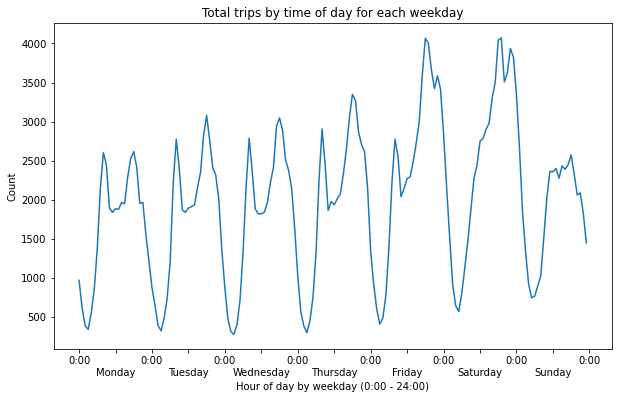

In [19]:
grouped = df_003.groupby(['trip_start_weekday', 'trip_start_hour'])["Trip ID"].count()

fig, ax = plt.subplots()
fig = grouped.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Count")
plt.title("Total trips by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

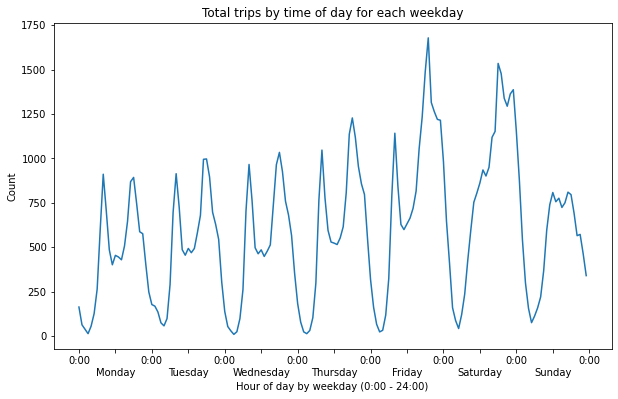

In [7]:
grouped = mini_df.groupby(['trip_start_weekday', 'trip_start_hour'])["trip_id"].count()

fig, ax = plt.subplots()
fig = grouped.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Count")
plt.title("Total trips by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

**Add analysis of graph above**

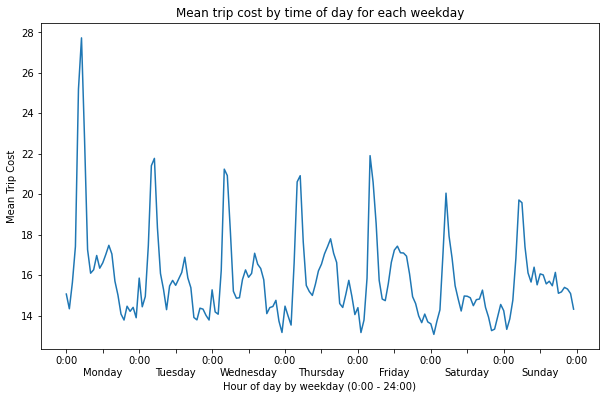

In [20]:
grouped = df_003.groupby(['trip_start_weekday', 'trip_start_hour'])["Trip Total"].mean()

fig, ax = plt.subplots()
fig = grouped.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Mean Trip Cost")
plt.title("Mean trip cost by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

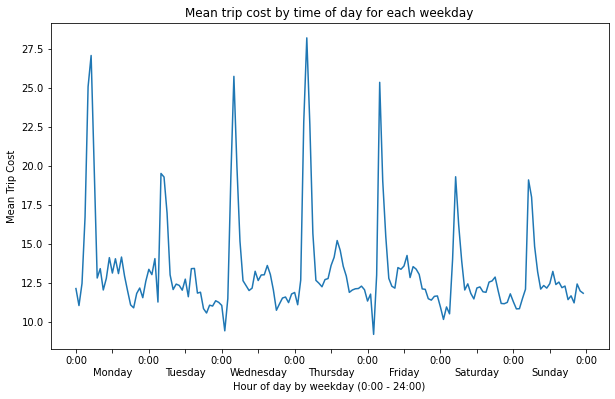

In [8]:
grouped = mini_df.groupby(['trip_start_weekday', 'trip_start_hour'])["trip_total"].mean()

fig, ax = plt.subplots()
fig = grouped.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Mean Trip Cost")
plt.title("Mean trip cost by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

**Add analysis of graph above**

In [21]:
df_003.columns

Index(['Unnamed: 0', 'Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location', 'date',
       'trip_start_month', 'trip_start_weekday', 'trip_start_hour'],
      dtype='object')

In [22]:
# 2 more columns of interest
df_003['trip_total_per_mile'] = df_003['Trip Total'] / df_003['Trip Miles']
df_003['trip_total_per_sec'] = df_003['Trip Total'] / df_003['Trip Seconds']

In [25]:
census_grouped_mile = df_003.groupby(['Pickup Census Tract'])["trip_total_per_mile"].mean()

In [28]:
census_grouped_mile = census_grouped_mile.reset_index()

In [42]:
print("Top 10 Census Tracts with Highest Mean Trip Total Per Mile")
census_grouped_mile[census_grouped_mile['trip_total_per_mile']!= float('inf')].sort_values('trip_total_per_mile', ascending=False)[:10]

Top 10 Census Tracts with Highest Mean Trip Total Per Mile


,Pickup Census Tract,trip_total_per_mile
511,17031560100.0,8.388889
694,17031809100.0,6.982759
590,17031670400.0,6.863636
162,17031120400.0,5.607532
466,17031460200.0,5.560339
723,17031821600.0,5.485354
132,17031081201.0,5.484380
133,17031081202.0,5.431690
131,17031081100.0,5.333691
130,17031081000.0,5.268028


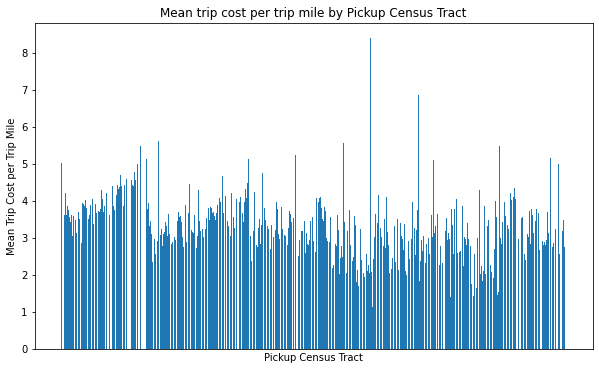

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(census_grouped_mile["Pickup Census Tract"], census_grouped_mile["trip_total_per_mile"])
plt.xlabel("Pickup Census Tract")
plt.ylabel("Mean Trip Cost per Trip Mile")
plt.title("Mean trip cost per trip mile by Pickup Census Tract")
ax.set_xticks([])
# labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
#           "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
# ax.set_xticklabels(labels)
plt.show()

In [43]:
census_grouped_sec = df_003.groupby(['Pickup Census Tract'])["trip_total_per_sec"].mean()

In [44]:
census_grouped_sec = census_grouped_sec.reset_index()

In [45]:
print("Top 10 Census Tracts with Highest Mean Trip Total Per Second")
census_grouped_sec.sort_values('trip_total_per_sec', ascending=False)[:10]

Top 10 Census Tracts with Highest Mean Trip Total Per Second


,Pickup Census Tract,trip_total_per_sec
363,17031292400.0,0.045676
694,17031809100.0,0.042453
590,17031670400.0,0.035116
619,17031691300.0,0.033999
726,17031830005.0,0.031478
265,17031222600.0,0.030197
400,17031351500.0,0.030154
511,17031560100.0,0.027656
576,17031650500.0,0.027166
666,17031750300.0,0.023367


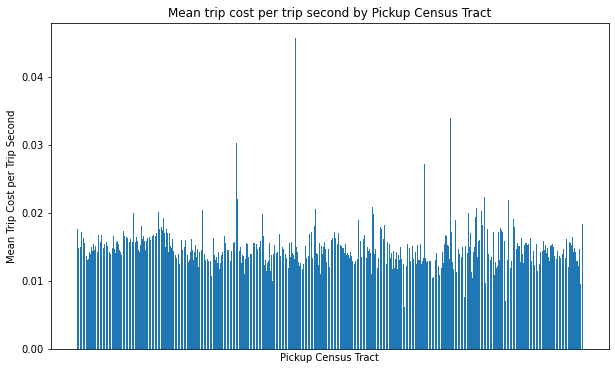

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(census_grouped_sec["Pickup Census Tract"], census_grouped_sec["trip_total_per_sec"])
plt.xlabel("Pickup Census Tract")
plt.ylabel("Mean Trip Cost per Trip Second")
plt.title("Mean trip cost per trip second by Pickup Census Tract")
ax.set_xticks([])
# labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
#           "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
# ax.set_xticklabels(labels)
plt.show()

## 2. Census Data

In [49]:
acs = gpd.read_file("data/acs/final_acs.shp")
acs.head(5)

,GEO_ID,name10,med_income,perc_black,perc_white,tot_pop,tot_black,tot_white,geometry
0,1500000US170314607002,Block 2005,37571.0,26.113861,55.569307,808,211,449,"POLYGON ((-87.55480 41.73369, -87.55522 41.733..."
1,1500000US170314607003,Block 3000,22292.0,46.186441,44.915254,472,218,212,"POLYGON ((-87.55485 41.73551, -87.55526 41.735..."
2,1500000US170314910004,Block 4014,45250.0,98.889615,0.195950,1531,1514,3,"POLYGON ((-87.62326 41.69805, -87.62325 41.697..."
3,1500000US170314910002,Block 2033,22206.0,100.000000,0.000000,1067,1067,0,"POLYGON ((-87.62313 41.69350, -87.62313 41.693..."
4,1500000US170314910005,Block 5001,20594.0,98.812849,1.187151,1432,1415,17,"POLYGON ((-87.62797 41.69526, -87.62796 41.695..."


## 3. Merging Datasets

In [50]:
df_003.columns

Index(['Unnamed: 0', 'Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location', 'date',
       'trip_start_month', 'trip_start_weekday', 'trip_start_hour',
       'trip_total_per_mile', 'trip_total_per_sec'],
      dtype='object')

In [355]:
gdf = gpd.GeoDataFrame(df_003, geometry=gpd.points_from_xy(df_003["Pickup Centroid Longitude"], 
                                                            df_003["Pickup Centroid Latitude"]), crs="EPSG:4326")

# Joining census and acs census datasets based on the customers' pickup location
# Michelle, I believe this is the one we can use for modeling purposes.
gdf_acs = gpd.sjoin(gdf, acs, op="within")

/Users/michelleorden/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [320]:
gdf_acs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 314532 entries, 0 to 319098
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  314532 non-null  int64         
 1   Trip ID                     314532 non-null  object        
 2   Trip Start Timestamp        314532 non-null  datetime64[ns]
 3   Trip End Timestamp          314532 non-null  datetime64[ns]
 4   Trip Seconds                313944 non-null  float64       
 5   Trip Miles                  314516 non-null  float64       
 6   Pickup Census Tract         314532 non-null  object        
 7   Dropoff Census Tract        314532 non-null  object        
 8   Pickup Community Area       314532 non-null  object        
 9   Dropoff Community Area      314532 non-null  object        
 10  Fare                        314532 non-null  float64       
 11  Tip                         314

In [321]:
gdf_acs.head()

,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,geometry,index_right,GEO_ID,name10,med_income,perc_black,perc_white,tot_pop,tot_black,tot_white
0,96692526,9c54e99de2a3eb56af84eb128c98d9f723a2cd72,2019-11-11 11:30:00,2019-11-11 11:45:00,524.0,1.9,nan,nan,29.0,nan,...,POINT (-87.71722 41.86019),1249,1500000US170318387004,Block 4013,18821.0,100.0,0.0,634,634,0
358,39731918,6651f1e5f07c9ae3ea7d088cf7daf3f53f834427,2019-05-09 09:45:00,2019-05-09 10:00:00,738.0,3.4,nan,nan,29.0,25.0,...,POINT (-87.71722 41.86019),1249,1500000US170318387004,Block 4013,18821.0,100.0,0.0,634,634,0
359,101581077,5fd26ef275d97fc81b4745f610c874482a072e76,2019-11-27 06:30:00,2019-11-27 06:45:00,800.0,3.0,nan,nan,29.0,28.0,...,POINT (-87.71722 41.86019),1249,1500000US170318387004,Block 4013,18821.0,100.0,0.0,634,634,0
550,49767947,4a5d0af38acdeb766c389c19cc187a6e160696e5,2019-06-10 07:30:00,2019-06-10 07:30:00,237.0,0.6,nan,nan,29.0,29.0,...,POINT (-87.71722 41.86019),1249,1500000US170318387004,Block 4013,18821.0,100.0,0.0,634,634,0
904,69398328,d97acdbd822a3329354129fa471ec3a520928231,2019-08-13 14:00:00,2019-08-13 14:30:00,1259.0,6.2,nan,nan,29.0,25.0,...,POINT (-87.71722 41.86019),1249,1500000US170318387004,Block 4013,18821.0,100.0,0.0,634,634,0


In [ ]:
gdf = gpd.GeoDataFrame(mini_df, geometry=gpd.points_from_xy(mini_df.pickup_centroid_longitude, 
                                                            mini_df.pickup_centroid_latitude), crs="EPSG:4326")

# Joining census and acs census datasets based on the customers' pickup location
# Michelle, I believe this is the one we can use for modeling purposes.
gdf_acs = gpd.sjoin(gdf, acs, op="within")

In [55]:
ride_count = gdf_acs.groupby('GEO_ID')["Trip ID"].count().to_frame('total_trips').reset_index()
vars_by_census_tract = acs.merge(ride_count, on="GEO_ID", how="outer")
vars_by_census_tract["total_trips"] = vars_by_census_tract["total_trips"].fillna(0)

In [ ]:
ride_count = gdf_acs.groupby('GEO_ID')["trip_id"].count().to_frame('total_trips').reset_index()
vars_by_census_tract = acs.merge(ride_count, on="GEO_ID", how="outer")
vars_by_census_tract["total_trips"] = vars_by_census_tract["total_trips"].fillna(0)

In [57]:
! pip install mapclassify

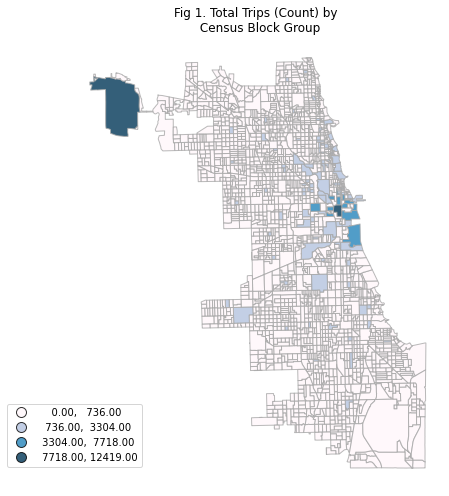

In [58]:
fig = vars_by_census_tract.plot(column='total_trips',
                        cmap = 'PuBu',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 1. Total Trips (Count) by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [60]:
pooled_trips = gdf_acs.groupby('GEO_ID')['Shared Trip Authorized'].mean().to_frame('avg_shared_trips').reset_index()
pooled_trips["avg_shared_trips"] = pooled_trips["avg_shared_trips"] * 100
vars_by_census_tract = acs.merge(pooled_trips, on="GEO_ID", how="outer")
vars_by_census_tract["avg_shared_trips"] = vars_by_census_tract["avg_shared_trips"].fillna(0)

In [52]:
pooled_trips = gdf_acs.groupby('GEO_ID')['shared_trip_authorized'].mean().to_frame('avg_shared_trips').reset_index()
pooled_trips["avg_shared_trips"] = pooled_trips["avg_shared_trips"] * 100
vars_by_census_tract = acs.merge(pooled_trips, on="GEO_ID", how="outer")
vars_by_census_tract["avg_shared_trips"] = vars_by_census_tract["avg_shared_trips"].fillna(0)

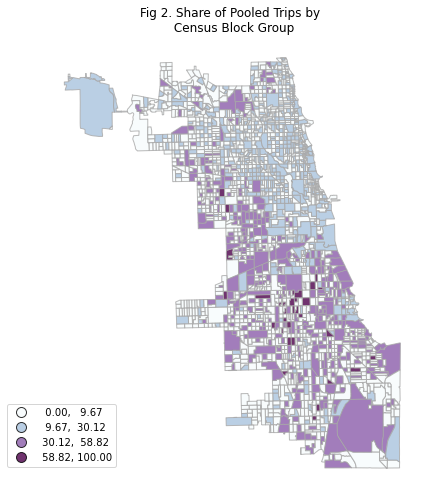

In [61]:
fig = vars_by_census_tract.plot(column='avg_shared_trips',
                        cmap = 'BuPu',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 2. Share of Pooled Trips by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [63]:
avg_cost = gdf_acs.groupby('GEO_ID')['Trip Total'].mean().to_frame('avg_trip_cost').reset_index()
vars_by_census_tract = vars_by_census_tract.merge(avg_cost, on="GEO_ID", how="outer")
vars_by_census_tract['avg_trip_cost'] = vars_by_census_tract['avg_trip_cost'].fillna(0)

In [54]:
avg_cost = gdf_acs.groupby('GEO_ID')['trip_total'].mean().to_frame('avg_trip_cost').reset_index()
vars_by_census_tract = vars_by_census_tract.merge(avg_cost, on="GEO_ID", how="outer")
vars_by_census_tract['avg_trip_cost'] = vars_by_census_tract['avg_trip_cost'].fillna(0)

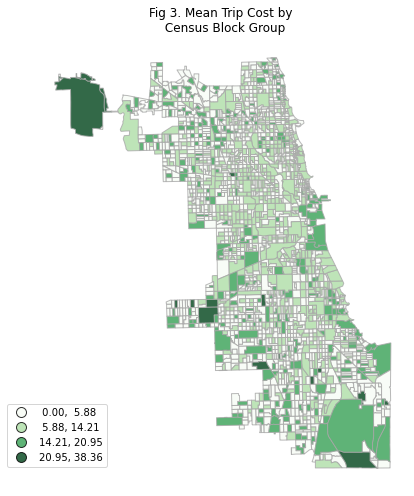

In [64]:
fig = vars_by_census_tract.plot(column='avg_trip_cost',
                        cmap = 'Greens',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 3. Mean Trip Cost by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [65]:
avg_miles = gdf_acs.groupby('GEO_ID')['Trip Miles'].mean().to_frame('avg_trip_miles').reset_index()
vars_by_census_tract = vars_by_census_tract.merge(avg_miles, on="GEO_ID", how="outer")
vars_by_census_tract['avg_trip_miles'] = vars_by_census_tract['avg_trip_miles'].fillna(0)

In [56]:
avg_miles = gdf_acs.groupby('GEO_ID')['trip_miles'].mean().to_frame('avg_trip_miles').reset_index()
vars_by_census_tract = vars_by_census_tract.merge(avg_miles, on="GEO_ID", how="outer")
vars_by_census_tract['avg_trip_miles'] = vars_by_census_tract['avg_trip_miles'].fillna(0)

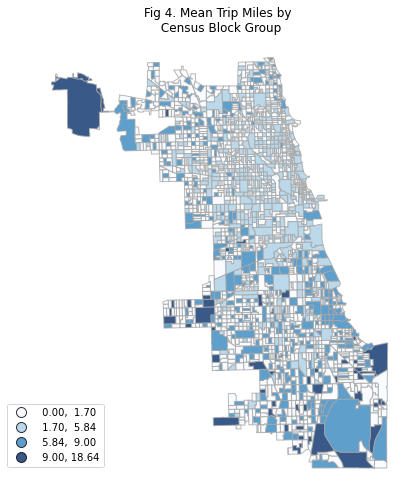

In [66]:
fig = vars_by_census_tract.plot(column='avg_trip_miles',
                        cmap = 'Blues',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 4. Mean Trip Miles by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [67]:
# adding 2 additional graphs

In [102]:
avg_tot_per_mile = gdf_acs.groupby('GEO_ID')['trip_total_per_mile'].mean().to_frame('avg_trip_total_per_miles').reset_index()

In [104]:
avg_tot_per_mile["avg_trip_total_per_miles"].replace([np.inf, -np.inf], np.nan, inplace=True)

In [107]:
vars_by_census_tract = vars_by_census_tract.merge(avg_tot_per_mile, on="GEO_ID", how="outer")

In [108]:
vars_by_census_tract['avg_trip_total_per_miles'] = vars_by_census_tract['avg_trip_total_per_miles'].fillna(0)

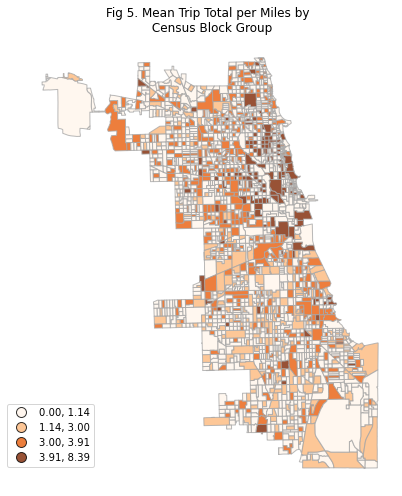

In [109]:
fig = vars_by_census_tract.plot(column='avg_trip_total_per_miles',
                        cmap = 'Oranges',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 5. Mean Trip Total per Miles by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [62]:
gdf_acs.columns

Index(['Unnamed: 0', 'Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location', 'date',
       'trip_start_month', 'trip_start_weekday', 'trip_start_hour',
       'trip_total_per_mile', 'trip_total_per_sec', 'geometry', 'index_right',
       'GEO_ID', 'name10', 'med_income', 'perc_black', 'perc_white', 'tot_pop',
       'tot_black', 'tot_white'],
      dtype='object')

In [110]:
avg_tot_per_sec = gdf_acs.groupby('GEO_ID')['trip_total_per_sec'].mean().to_frame('avg_trip_total_per_sec').reset_index()

In [111]:
vars_by_census_tract = vars_by_census_tract.merge(avg_tot_per_sec, on="GEO_ID", how="outer")

In [112]:
vars_by_census_tract['avg_trip_total_per_sec'] = vars_by_census_tract['avg_trip_total_per_sec'].fillna(0)

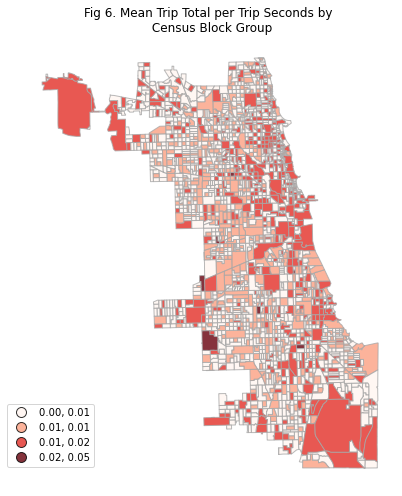

In [114]:
fig = vars_by_census_tract.plot(column='avg_trip_total_per_sec',
                        cmap = 'Reds',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 6. Mean Trip Total per Trip Seconds by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

# Module 2: Models

1. Given a new rider’s pickup census tract and dropoff census tract, what is the predicted total trip cost and ‘additional charges’ for the rider?

2. Given a new rider’s pickup census tract, what is the probability that the rider will request a ‘pooled’ trip (shared ride)?

### Some cleaning

In [322]:
gdf_acs.columns

Index(['Unnamed: 0', 'Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location', 'date',
       'trip_start_month', 'trip_start_weekday', 'trip_start_hour',
       'trip_total_per_mile', 'trip_total_per_sec', 'geometry', 'index_right',
       'GEO_ID', 'name10', 'med_income', 'perc_black', 'perc_white', 'tot_pop',
       'tot_black', 'tot_white'],
      dtype='object')

In [356]:
# replace inf with nan
gdf_acs["trip_total_per_mile"].replace([np.inf, -np.inf], np.nan, inplace=True)
gdf_acs["trip_total_per_sec"].replace([np.inf, -np.inf], np.nan, inplace=True)

In [357]:
# drop Unnamed: 0, index_right,
gdf_acs.drop(columns=["Unnamed: 0", "index_right"], inplace = True)

In [388]:
needs_fill_na = ["Trip Seconds", "Trip Miles", "Dropoff Centroid Latitude", "Dropoff Centroid Longitude", "trip_total_per_mile", "trip_total_per_sec", "med_income", "perc_black", "perc_white"]

In [389]:
# fill na's with median values
for var in needs_fill_na:
    gdf_acs[var] = gdf_acs[var].fillna(gdf_acs[var].median())
    # gdf_acs[var] = gdf_acs[var].transform(lambda x: x.fillna(gdf_acs[["GEO_ID", var]].groupby("GEO_ID").mean()))

In [490]:
gdf_acs["shared_trip_auth_num"]= np.where(gdf_acs["Shared Trip Authorized"] == True, 1, -1)

In [325]:
len(gdf_acs["GEO_ID"].unique())

832

In [326]:
len(vars_by_census_tract["GEO_ID"].unique())

2194

Calling "Shared Trip Authorized" our target column because I think it's the most interesting graph from above.

## Split Train Test

After merging our 2 datasets and cleaning our data, the first thing we will do is plit into training and test sets. We will not touch the test set until we make final predictions.

In [391]:
from sklearn.model_selection import train_test_split

In [492]:
# split df into features and labels
X = gdf_acs.drop(columns=["shared_trip_auth_num"])
y = pd.DataFrame(gdf_acs["shared_trip_auth_num"], columns=["shared_trip_auth_num"])

# split df into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# df that's just training
df_train = pd.concat([X_train, y_train], axis=1)

## Feature Selection

Our gdf_acs dataframe has 22 numeric columns. Let's do some feature selection to take out any columns that do not add new information to our model. We will choose the best 15 variables to include in our model.
</b>
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [393]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [493]:
# just look at numeric columns
X_train = X_train.drop(["Trip ID", "Trip Start Timestamp", "Trip End Timestamp","Pickup Census Tract", "Dropoff Census Tract", "Pickup Community Area", "Dropoff Community Area", "geometry", "name10", "GEO_ID", "Pickup Centroid Location", "Dropoff Centroid Location", "date"], axis=1)

### VarianceThreshold

In [494]:
# VarianceThreshold weeds out features with zero Variance
selector = VarianceThreshold()
print("Original feature shape:", X_train.shape)
new_X = selector.fit_transform(X_train)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (220172, 23)
Transformed feature shape: (220172, 23)


No variables were dropped (none had zero variance), which is good.

### SelectKBest

In [495]:
# get k highest scoring variables
fs = SelectKBest(score_func=mutual_info_regression, k="all")

In [496]:
# learn relationship from training data (drop non-numerical data)
fs.fit(X_train, y_train)

/Users/michelleorden/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fe3f8f21a60>)

In [497]:
feature_scores = pd.DataFrame({'variables': X_train.columns.tolist(), 
                               'score': fs.scores_})

In [498]:
# top 15 variables
top15 = feature_scores.sort_values(by="score", ascending=False).head(15)["variables"].tolist()

In [499]:
feature_scores.sort_values(by="score", ascending=False).head(15).reset_index()

,index,variables,score
0,6,Shared Trip Authorized,0.499429
1,15,trip_total_per_mile,0.288835
2,7,Trips Pooled,0.266896
3,16,trip_total_per_sec,0.255044
4,5,Trip Total,0.186556
5,4,Additional Charges,0.165951
6,17,med_income,0.035364
7,8,Pickup Centroid Latitude,0.035349
8,9,Pickup Centroid Longitude,0.035284
9,11,Dropoff Centroid Longitude,0.034174


In [502]:
to_drop = feature_scores.sort_values(by="score", ascending=False).tail(8).reset_index()['variables']

We will use these 15 numeric columns, and drop the 8 columns with the lowest k-scores.

In [504]:
X_train = X_train.drop(to_drop, axis=1)

In [505]:
X_test = X_test.drop(["Trip ID", "Trip Start Timestamp", "Trip End Timestamp","Pickup Census Tract", "Dropoff Census Tract", "Pickup Community Area", "Dropoff Community Area", "geometry", "name10", "GEO_ID", "Pickup Centroid Location", "Dropoff Centroid Location", "date"], axis=1)

In [506]:
X_test = X_test.drop(to_drop, axis=1)

## Lasso Regression

Feature Columns: 
Target Columns:

In [1]:
from sklearn.linear_model import Lasso

In [507]:
lasso_reg = Lasso(alpha=0.1)

In [510]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [511]:
y_pred = lasso_reg.predict(X_test)

In [513]:
# need to get categorical label from numeric
y_pred = np.sign(y_pred)

In [514]:
y_pred

array([-1., -1., -1., ..., -1.,  1., -1.])

In [439]:
from sklearn.metrics import mean_squared_error

In [515]:
err = mean_squared_error(np.array(y_test), y_pred)

In [516]:
err

4.23908435777872e-05

## Random Forests

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [ ]:
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)